<a href="https://colab.research.google.com/github/Mohamed-Adel-l/Brain_Tumor_X-ray/blob/main/Brain_Tumor_X_ray_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from google.colab import files
import zipfile
import matplotlib.pyplot as plt
import os
import numpy as np
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import time
from google.colab import drive

In [ ]:
upload=files.upload()

Saving Dataset.rar to Dataset.rar


In [ ]:
!apt-get install unrar

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [ ]:
!unrar x Dataset.rar


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from Dataset.rar

Creating    Dataset                                                   OK
Creating    Dataset/Brain Tumor Data Set                              OK
Creating    Dataset/Brain Tumor Data Set/Grayscale_Brain_Healthy      OK
Extracting  Dataset/Brain Tumor Data Set/Grayscale_Brain_Healthy/Not Cancer  (1).jpeg       0%  OK 
Extracting  Dataset/Brain Tumor Data Set/Grayscale_Brain_Healthy/Not Cancer  (1).jpg       0%  OK 
Extracting  Dataset/Brain Tumor Data Set/Grayscale_Brain_Healthy/Not Cancer  (1).png       0%  OK 
Extracting  Dataset/Brain Tumor Data Set/Grayscale_Brain_Healthy/Not Cancer  (10).jpg       0%  OK 
Extracting  Dataset/Brain Tumor Data Set/Grayscale_Brain_Healthy/Not Cancer  (100).jpg       0%  OK 
Extracting  Dataset/Brain Tumor Data Set/Grayscale_Brain_Healthy/Not Cancer  (1000).jpg       0%  OK 
Extracting  Dataset/B

In [ ]:
print(os.listdir("Dataset"))

['Brain Tumor Data Set']


In [ ]:
path = "Dataset/Brain Tumor Data Set"
dataset = tf.keras.utils.image_dataset_from_directory(
    path,
    labels='inferred',
    label_mode='binary',
    image_size=(224, 224),
    batch_size=32
)
class_names = dataset.class_names
dataset=dataset.shuffle(1000)
training=dataset.take(int(len(dataset)*0.7))
testing=dataset.skip(int(len(dataset)*0.7))
print(len(training))
print(len(testing))

Found 4514 files belonging to 2 classes.
99
43


['Grayscale_Brain_Healthy', 'Grayscale_Brain_Tumor']


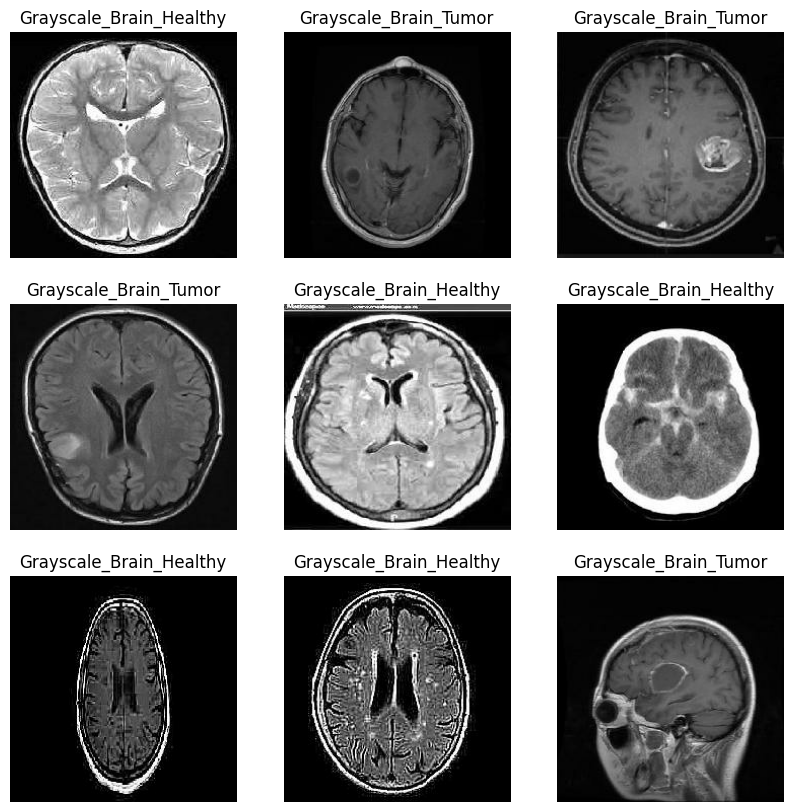

In [ ]:
print(class_names)
plt.figure(figsize=(10, 10))
for images, labels in training.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    label=class_names[int(labels[i])]
    plt.title(label)
    plt.axis("off")
plt.show()

In [ ]:
def dataset_to_numpy(dataset):
    images=[]
    labels=[]
    for image,label in training:
       images.append(image.numpy())
       labels.append(label.numpy())
    images=np.concatenate(images,axis=0)
    labels=np.concatenate(labels,axis=0)
    return images,labels

X_train,Y_train=dataset_to_numpy(training)
X_test,Y_test=dataset_to_numpy(testing)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(3138, 224, 224, 3)
(3138, 1)
(3138, 224, 224, 3)
(3138, 1)


In [ ]:
X_train=X_train.reshape(X_train.shape[0],-1)
X_test=X_test.reshape(X_test.shape[0],-1)
print(X_train.shape)
print(X_test.shape)

(3138, 150528)
(3138, 150528)


In [ ]:
pca=PCA(n_components=100)                #PCA
training=pca.fit_transform(X_train)
testing=pca.transform(X_test)
print(training.shape)
print(testing.shape)

(3138, 100)
(3138, 100)


In [ ]:
k_values=[1,3,5,7]
print("KNN\n"  )                          #KNN
for k in k_values:
  knn=KNeighborsClassifier(n_neighbors=k)
  start_time=time.time()
  knn.fit(training,Y_train.ravel())
  end_time=time.time()
  y_pred=knn.predict(testing)
  accuracy = accuracy_score(Y_test, y_pred)
  elapsed_time=end_time-start_time
  print(f"K = {k}")
  print(f"   Accuracy      : {accuracy:.4f}")
  print(f"   Train Time    : {elapsed_time:.7f} seconds\n")

KNN

K = 1
   Accuracy      : 0.9888
   Train Time    : 0.0135231 seconds

K = 3
   Accuracy      : 0.9506
   Train Time    : 0.0016887 seconds

K = 5
   Accuracy      : 0.9277
   Train Time    : 0.0011432 seconds

K = 7
   Accuracy      : 0.9044
   Train Time    : 0.0010431 seconds



In [ ]:
dt=DecisionTreeClassifier()
start_time=time.time()
dt.fit(training,Y_train.ravel())
end_time=time.time()
y_pred=dt.predict(testing)
elapsed_time=end_time-start_time
accuracy=accuracy_score(Y_test,y_pred)
print("Decision Tree Classification\n" )
print(f"   Accuracy      : {accuracy:.4f}")
print(f"   Train Time    : {elapsed_time:.7f} seconds\n")

Decision Tree Classification

   Accuracy      : 0.9700
   Train Time    : 0.4404855 seconds



In [ ]:
svm=SVC(kernel='linear',max_iter=200000 ,verbose=True)
start_time=time.time()
svm.fit(training,Y_train.ravel())
end_time=time.time()
y_pred=svm.predict(testing)
elapsed_time=end_time-start_time
accuracy=accuracy_score(Y_test,y_pred)
print("SVM Classification\n" )
print(f"   Accuracy      : {accuracy:.4f}")
print(f"   Train Time    : {elapsed_time:.7f} seconds\n")
print(f"   Support Vectors: {len(svm.support_vectors_)}")

[LibSVM]

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=200000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVM Classification

   Accuracy      : 0.6549
   Train Time    : 4.2690978 seconds

   Support Vectors: 2322


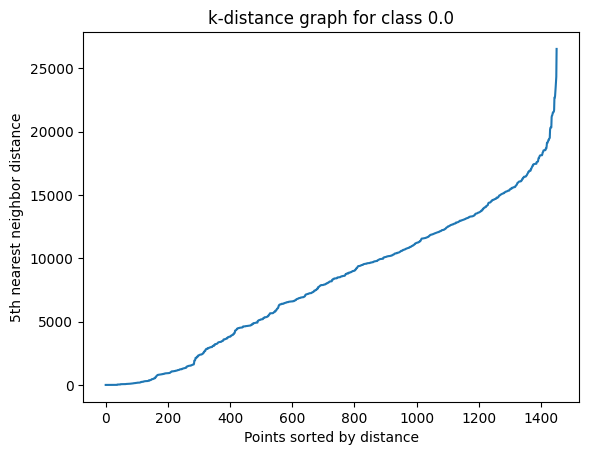

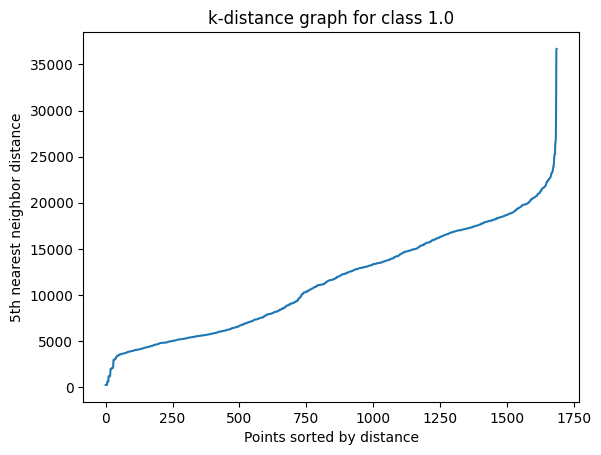

In [ ]:
unique_classes = np.unique(Y_train.ravel())
for class_label in unique_classes:
    X_class = training[Y_train.ravel() == class_label]
    neigh = NearestNeighbors(n_neighbors=5)
    nbrs = neigh.fit(X_class)
    distances, _ = nbrs.kneighbors(X_class)
    dist_sorted = np.sort(distances[:, 4])

    plt.figure()
    plt.plot(dist_sorted)
    plt.title(f'k-distance graph for class {class_label}')
    plt.xlabel('Points sorted by distance')
    plt.ylabel('5th nearest neighbor distance')
    plt.show()

In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
from sklearn.cluster import DBSCAN
unique_classes = np.unique(Y_train)
all_border_points = []
all_border_labels = []
for class_label in unique_classes:
    X_class = training[Y_train.ravel() == class_label]
    dbscan = DBSCAN(eps=23000, min_samples=200)
    dbscan.fit(X_class)
    core_sample_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_sample_mask[dbscan.core_sample_indices_] = True
    border_mask = (dbscan.labels_ != -1) & (~core_sample_mask)
    print(f"Class {class_label}:")
    print(f"  Total points: {len(X_class)}")
    print(f"  Core points: {np.sum(core_sample_mask)}")
    print(f"  Border points: {np.sum(border_mask)}")
    print(f"  Noise points: {np.sum(dbscan.labels_ == -1)}")

    all_border_points.append(X_class[border_mask])
    all_border_labels.append(np.full(np.sum(border_mask), class_label))

if all_border_points:
    X_border = np.concatenate(all_border_points, axis=0)
    Y_border = np.concatenate(all_border_labels, axis=0)
else:
    X_border = np.array([])
    Y_border = np.array([])
print("Border points shape:", X_border.shape)
print("Border labels shape:", Y_border.shape)

Class 0.0:
  Total points: 1451
  Core points: 1174
  Border points: 266
  Noise points: 11
Class 1.0:
  Total points: 1687
  Core points: 1291
  Border points: 341
  Noise points: 55
Border points shape: (607, 100)
Border labels shape: (607,)


In [ ]:
k_values=[1,3,5,7]
print("KNN\n" )                        #KNN on reduced data
for k in k_values:
  knn=KNeighborsClassifier(n_neighbors=k)
  start_time=time.time()
  knn.fit(X_border,Y_border.ravel())
  end_time=time.time()
  y_pred=knn.predict(testing)
  accuracy = accuracy_score(Y_test, y_pred)
  elapsed_time=end_time-start_time
  print(f"K = {k}")
  print(f"  Accuracy      : {accuracy:.4f}")
  print(f"  Train Time    : {elapsed_time:.7f} seconds\n")


KNN

K = 1
  Accuracy      : 0.7205
  Train Time    : 0.0012484 seconds

K = 3
  Accuracy      : 0.7033
  Train Time    : 0.0008419 seconds

K = 5
  Accuracy      : 0.6546
  Train Time    : 0.0009735 seconds

K = 7
  Accuracy      : 0.6431
  Train Time    : 0.0008922 seconds



In [ ]:
dt=DecisionTreeClassifier()
start_time=time.time()
dt.fit(X_border,Y_border.ravel())
end_time=time.time()
y_pred=dt.predict(testing)
elapsed_time=end_time-start_time
accuracy=accuracy_score(Y_test,y_pred)
print("Decision Tree Classification\n")
print(f"   Accuracy      : {accuracy:.4f}")
print(f"   Train Time    : {elapsed_time:.7f} seconds\n")

Decision Tree Classification

   Accuracy      : 0.6045
   Train Time    : 0.0693285 seconds



In [ ]:
svm=SVC(kernel='linear',max_iter=100000,verbose=True)
start_time=time.time()
svm.fit(X_border,Y_border.ravel())
end_time=time.time()
y_pred=svm.predict(testing)
elapsed_time=end_time-start_time
accuracy=accuracy_score(Y_test,y_pred)
print("SVM Classification\n" )
print(f"   Accuracy      : {accuracy:.4f}")
print(f"   Train Time    : {elapsed_time:.7f} seconds\n")
print(f"   Support Vectors: {len(svm.support_vectors_)}")

[LibSVM]SVM Classification

   Accuracy      : 0.5816
   Train Time    : 0.4239321 seconds

   Support Vectors: 391


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [ ]:
classifiers = {
    "KNN_1": KNeighborsClassifier(n_neighbors=1),
    "KNN_3": KNeighborsClassifier(n_neighbors=3),
    "KNN_5": KNeighborsClassifier(n_neighbors=5),
    "KNN_7": KNeighborsClassifier(n_neighbors=7),
    "DecisionTree": DecisionTreeClassifier(),
    "SVM": SVC(max_iter=100000)
}

In [ ]:
print("\nClassifier Evaluation Results\n" )
dimensions = range(10, 101, 10)
results = []
for n_components in dimensions:
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    print(f"\nwith {n_components} Eigen vectors ")
    for name, clf in classifiers.items():
          start_time = time.time()
          clf.fit(training, Y_train.ravel())
          end_time = time.time()

          y_pred = clf.predict(testing)
          accuracy = accuracy_score(Y_test, y_pred)
          elapsed_time = end_time - start_time

          print(f"\n{name} Classification")
          print("-" * (len(name) + 15))
          print(f"  Accuracy      : {accuracy:.4f}")
          print(f"  Train Time    : {elapsed_time:.7f} seconds")

          if name == "SVM":
           print(f"   Support Vectors: {len(clf.support_)}")
          results.append({"classifier": name,
                         "accuracy": accuracy,
                         "train_time": elapsed_time,
                         "n_components": n_components})

best_results = max(results, key=lambda x: x["accuracy"])
print("\n\n=== Best Result ===")
print(f"Classifier       : {best_results['classifier']}")
print(f"Eigen Vectors    : {best_results['n_components']}")
print(f"Accuracy         : {best_results['accuracy']:.4f}")
print(f"Training Time    : {best_results['train_time']:.7f} seconds")


Classifier Evaluation Results


with 10 Eigen vectors 

KNN_1 Classification
--------------------
  Accuracy      : 0.9888
  Train Time    : 0.0019367 seconds

KNN_3 Classification
--------------------
  Accuracy      : 0.9506
  Train Time    : 0.0010650 seconds

KNN_5 Classification
--------------------
  Accuracy      : 0.9277
  Train Time    : 0.0012002 seconds

KNN_7 Classification
--------------------
  Accuracy      : 0.9044
  Train Time    : 0.0009975 seconds

DecisionTree Classification
---------------------------
  Accuracy      : 0.9710
  Train Time    : 0.5132904 seconds

SVM Classification
------------------
  Accuracy      : 0.9407
  Train Time    : 0.5594876 seconds
   Support Vectors: 1558

with 20 Eigen vectors 

KNN_1 Classification
--------------------
  Accuracy      : 0.9888
  Train Time    : 0.0026343 seconds

KNN_3 Classification
--------------------
  Accuracy      : 0.9506
  Train Time    : 0.0016713 seconds

KNN_5 Classification
--------------------
  Accuracy